In [1]:
####################################
# Special code for Jupyter Notebook
####################################
# Show plots in the notebook

#%matplotlib inline 
%matplotlib notebook 



# Automatically reload any packages that changed
#%load_ext autoreload
#%autoreload 2

# Display multiple arguments
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

##################
# Import librarys
##################
# Third party libraries

import os
import sys
import glob
import json
import pandas as pd
import numpy as np
import pprint
import statistics as stat
import scipy as sp
import matplotlib.pyplot as plt
import plotly

import rainflow
import OrcFxAPI


# Python libraries
module_path = r"C:\Users\snod\OneDrive\CloudStation\DTU\Master in Wind Energy\06 - Master Thesis\19 - python modules"
sys.path.append(module_path)

import stephan_py as st
import pywasp_edu as pw

############################################
# Limit number of rows to print from Pandas
############################################
pd.options.display.max_rows = 40

pi = np.arccos(-1)




# Used in order to embed figures in the text
from IPython.display import Image  

# Plots of time histories from Orcaflex



In [2]:
# pretty plot rutine

def PlotInRows(arr, n_cols, n_rows):
    
    for i in range(n_cols):
        for j in range(len(folders)):
        
            if j == n_rows-1:
                print(arr[j][i])
            else:
                print(arr[j][i], end=" ")
    

In [3]:
# dataframe details
cols = ['Sim-file', 'Average','Max','Min','Abs max','std. dev']


In [4]:
# Set folders to use in plots
'''
folders = [r"D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline" ,
           r"D:\100 - Project files\02 - Orcaflex Runs\111 - NTM Batch UMain contr WE_mode2 - 7 Alt4 contr",
           r"D:\100 - Project files\02 - Orcaflex Runs\112 - NTM Batch UMain contr WE_mode2 - 8 peak 90"
          ]

folders = [r"D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline" ,
           r"D:\100 - Project files\02 - Orcaflex Runs\203 - NTM Batch UMain contr WE_mode2 - IPC - 3"
          ]

'''

folders = [r"D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline" ,
           r"D:\100 - Project files\02 - Orcaflex Runs\301 - IPC floating set 2 gain -10 sat 3deg"
          ]

plot_folder_switch = np.zeros((len(folders),), dtype=int) 

# Make dictionary for setting plot switch up
plot_folder_yes_no = dict(zip(folders, plot_folder_switch))


pprint.pprint(plot_folder_yes_no)


'\nfolders = [r"D:@ - Project files\x02 - Orcaflex RunsK - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline" ,\n           r"D:@ - Project files\x02 - Orcaflex RunsI - NTM Batch UMain contr WE_mode2 - 7 Alt4 contr",\n           r"D:@ - Project files\x02 - Orcaflex RunsJ - NTM Batch UMain contr WE_mode2 - 8 peak 90"\n          ]\n\nfolders = [r"D:@ - Project files\x02 - Orcaflex RunsK - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline" ,\n           r"D:@ - Project files\x02 - Orcaflex Runs\x83 - NTM Batch UMain contr WE_mode2 - IPC - 3"\n          ]\n\n'

{'D:\\100 - Project files\\02 - Orcaflex Runs\\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline': 0,
 'D:\\100 - Project files\\02 - Orcaflex Runs\\301 - IPC floating set 2 gain -10 sat 3deg': 0}


In [5]:
# set folders to use

# switch relevant folders on
plot_folder_yes_no[folders[0]] = 1
plot_folder_yes_no[folders[1]] = 1
#plot_folder_yes_no[folders[2]] = 1

# Reiterate folders
selected_folders = []
for folder in folders:
    if plot_folder_yes_no[folder] == 1:
        selected_folders.append(folder)

# finally print to check
pprint.pprint(plot_folder_yes_no)



{'D:\\100 - Project files\\02 - Orcaflex Runs\\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline': 1,
 'D:\\100 - Project files\\02 - Orcaflex Runs\\301 - IPC floating set 2 gain -10 sat 3deg': 1}


In [6]:
# Opening JSON file
with open(r'D:\100 - Project files\02 - Orcaflex Runs\extraction_defs.json') as json_file:
    extraction_data = json.load(json_file)
    
pprint.pprint(extraction_data, sort_dicts=False, width=150)

{'RootMxb1': ['Root connection Ey moment', '15MW RWT', 'OrcFxAPI.oeTurbine(1)'],
 'RootMyb1': ['Root connection Ex moment', '15MW RWT', 'OrcFxAPI.oeTurbine(1)'],
 'RootMzb1': ['Root connection Ez moment', '15MW RWT', 'OrcFxAPI.oeTurbine(1)'],
 'TipDxb1': ['In plane deflection', '15MW RWT', 'OrcFxAPI.oeTurbineEndB(1)'],
 'TipDyb1': ['Out of plane deflection', '15MW RWT', 'OrcFxAPI.oeTurbineEndB(1)'],
 'NcIMUTAxs': ['GX acceleration', '15MW RWT', 'None'],
 'NcIMUTAys': ['GY acceleration', '15MW RWT', 'None'],
 'NcIMUTAzs': ['GZ acceleration', '15MW RWT', 'None'],
 'YawBrTDxt': ['Dynamic x', 'Tower', 'OrcFxAPI.oeEndA'],
 'YawBrTDyt': ['Dynamic y', 'Tower', 'OrcFxAPI.oeEndA'],
 'TwrBsMxt': ['x bend moment', 'Tower', 'OrcFxAPI.oeEndB'],
 'TwrBsMyt': ['y bend moment', 'Tower', 'OrcFxAPI.oeEndB'],
 'PtfmSurge': ['Primary X', 'Floater', 'OrcFxAPI.oeVessel(0.0, 0.0, 0.0)'],
 'PtfmHeave': ['Primary Z', 'Floater', 'OrcFxAPI.oeVessel(0.0, 0.0, 0.0)'],
 'PtfmPitch': ['Primary rotation 2', 'Floater'

In [7]:
# Read variables from first TH csv file in each folder and compare extracted variables


GenVariableNames = []


for j in range(len(selected_folders)):
    
    sim_files, sim_file_folders_list, prefix = st.folders_files.list_simfiles(selected_folders[j])
    
    file_name = selected_folders[j] + '\\' + os.path.splitext(sim_files[0])[0] + "_TH.csv"
    print(file_name)
    
    GenVariableNames_list = pd.read_csv(file_name, index_col=0, nrows=0).columns.tolist()
    
    GenVariableNames.append(GenVariableNames_list)

# Make dictionary for setting plot switch up
plot_var_switch = np.zeros((len(GenVariableNames[0]),), dtype=int) 

plot_var_yes_no = dict(zip(GenVariableNames[0], plot_var_switch))

# finally print to check
pprint.pprint(plot_var_yes_no)

D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline\00001_w(Irreg_DIR000_Hs6.3_Tp11.5_U04_SEED10001)_W(NTM_U4.0_SEED10001)_TH.csv
D:\100 - Project files\02 - Orcaflex Runs\301 - IPC floating set 2 gain -10 sat 3deg\00001_w(Irreg_DIR000_Hs6.3_Tp11.5_U04_SEED10001)_W(NTM_U4.0_SEED10001)_TH.csv
{'ANCHTEN1': 0,
 'ANCHTEN2': 0,
 'ANCHTEN3': 0,
 'Blade pitch1': 0,
 'FAIRTEN1': 0,
 'FAIRTEN2': 0,
 'FAIRTEN3': 0,
 'Generator power': 0,
 'Generator torque': 0,
 'NcIMUTAxs': 0,
 'NcIMUTAys': 0,
 'NcIMUTAzs': 0,
 'PtfmHeave': 0,
 'PtfmPitch': 0,
 'PtfmSurge': 0,
 'RootMxb1': 0,
 'RootMyb1': 0,
 'RootMzb1': 0,
 'Rotor ang. vel.': 0,
 'Rotor thrust': 0,
 'Time [s]': 0,
 'TipDxb1': 0,
 'TipDyb1': 0,
 'TwrBsMxt': 0,
 'TwrBsMyt': 0,
 'YawBrTDxt': 0,
 'YawBrTDyt': 0}


In [8]:
# Select variables to plot
# Copy paste from above

# switch relevant variables on

plot_var_yes_no['NcIMUTAxs'] = 1
plot_var_yes_no['NcIMUTAys'] = 1
plot_var_yes_no['NcIMUTAzs'] = 1

plot_var_yes_no['TipDxb1'] = 1    
plot_var_yes_no['TipDyb1'] = 1

plot_var_yes_no['YawBrTDxt'] = 1
plot_var_yes_no['YawBrTDyt'] = 1

plot_var_yes_no['PtfmSurge'] = 1
plot_var_yes_no['PtfmHeave'] = 1
plot_var_yes_no['PtfmPitch'] = 1

plot_var_yes_no['RootMxb1'] = 1
plot_var_yes_no['RootMyb1'] = 1

plot_var_yes_no['TwrBsMxt'] = 1
plot_var_yes_no['TwrBsMyt'] = 1



n_plot_vars = sum(x == 1 for x in plot_var_yes_no.values())


# print to check update
pprint.pprint(plot_var_yes_no)

{'ANCHTEN1': 0,
 'ANCHTEN2': 0,
 'ANCHTEN3': 0,
 'Blade pitch1': 0,
 'FAIRTEN1': 0,
 'FAIRTEN2': 0,
 'FAIRTEN3': 0,
 'Generator power': 0,
 'Generator torque': 0,
 'NcIMUTAxs': 1,
 'NcIMUTAys': 1,
 'NcIMUTAzs': 1,
 'PtfmHeave': 1,
 'PtfmPitch': 1,
 'PtfmSurge': 1,
 'RootMxb1': 1,
 'RootMyb1': 1,
 'RootMzb1': 0,
 'Rotor ang. vel.': 0,
 'Rotor thrust': 0,
 'Time [s]': 0,
 'TipDxb1': 1,
 'TipDyb1': 1,
 'TwrBsMxt': 1,
 'TwrBsMyt': 1,
 'YawBrTDxt': 1,
 'YawBrTDyt': 1}


In [9]:
# Read stat csv files

df_res = []

for folder in selected_folders:
        
    df_res.append([])
        
    print(folder)
    
    prefix = os.path.basename(os.path.normpath(folder)).split("-")[0].strip()
        
    print(prefix)
        
    for i in range(len(plot_var_yes_no)):
            
        if plot_var_yes_no[GenVariableNames[0][i]] == 1:
            
            # path to statistical data csv file
            path_to_csv = folder + '\\' + prefix +'_[' + GenVariableNames[0][i] + '].csv'
                
            print(path_to_csv)
                
            df_res[-1].append(pd.read_csv(path_to_csv,index_col=0))
            #df_res[-1]
    

#print(df_res)
        

D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline
113
D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline\113_[RootMxb1].csv
D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline\113_[RootMyb1].csv
D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline\113_[TipDxb1].csv
D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline\113_[TipDyb1].csv
D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline\113_[NcIMUTAxs].csv
D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline\113_[NcIMUTAys].csv
D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMain contr WE_mode2 - 9 twr frq baseline\113_[NcIMUTAzs].csv
D:\100 - Project files\02 - Orcaflex Runs\113 - NTM Batch UMai

In [10]:
# Arranging data and plotting

if not os.path.exists("images"):
    os.mkdir("images")

# averaging over the 6 SEED's

x_labels = ["U04","U06","U08","U10","U12","U14","U16","U18","U20","U22","U24"]


stat_value = cols[4]
print(stat_value)


folder_prefix = []
plot_vars = []
units = []

var_counter = 0

plot_data = np.zeros((len(selected_folders),n_plot_vars,len(x_labels)))  

print(plot_data)


for var in GenVariableNames[0]:
    
            
    if plot_var_yes_no[var] == 1:   
        
        print(var)
        
        plot_vars.append(var)
        
        folder_counter = 0
    
        for folder in selected_folders:
            
            print(folder)
            
            folder_prefix.append(os.path.basename(os.path.normpath(folder)).split("-")[0].strip())
            
            df = []
            
            df = df_res[selected_folders.index(folder)][var_counter]
                
            unit = df.index.name
            units.append(unit)
            print(unit)
                
                
            # collect data
            # Read data based on wind speed
            for x_label in x_labels:
                
                df_tmp = []
                
                df_tmp = (df[df['Sim-file'].str.contains(x_label)])
                
                #df_tmp
                
                #print(df_tmp[stat_value].mean())
                plot_data[selected_folders.index(folder)][var_counter][x_labels.index(x_label)] = \
                    df_tmp[stat_value].mean()
                

                
        var_counter +=1

print(plot_data)

Abs max
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0

[22376.219, 39954.432, 55213.178, 58010.903, 61618.025, 61688.494, 60090.631, 53927.617, 49105.629, 46407.513, 44310.49]
[20836.28, 37930.036, 51676.566, 59576.597, 58322.946, 62340.088, 62193.79, 60931.588, 56346.904, 55143.37, 51639.624]


<IPython.core.display.Javascript object>


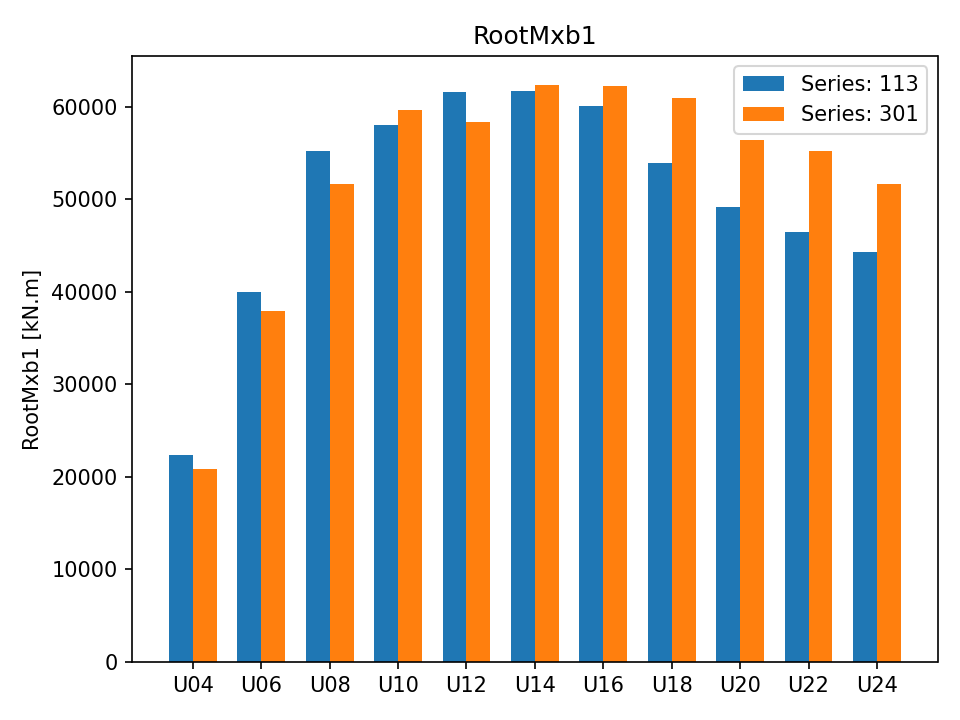

[19394.84, 21533.174, 23952.959, 26111.566, 28310.878, 29433.725, 32064.891, 32576.951, 33829.718, 33763.641, 35781.781]
[19230.598, 21489.293, 24030.115, 26464.502, 28793.076, 30809.322, 33132.126, 32738.833, 34660.389, 35576.356, 36975.982]


<IPython.core.display.Javascript object>


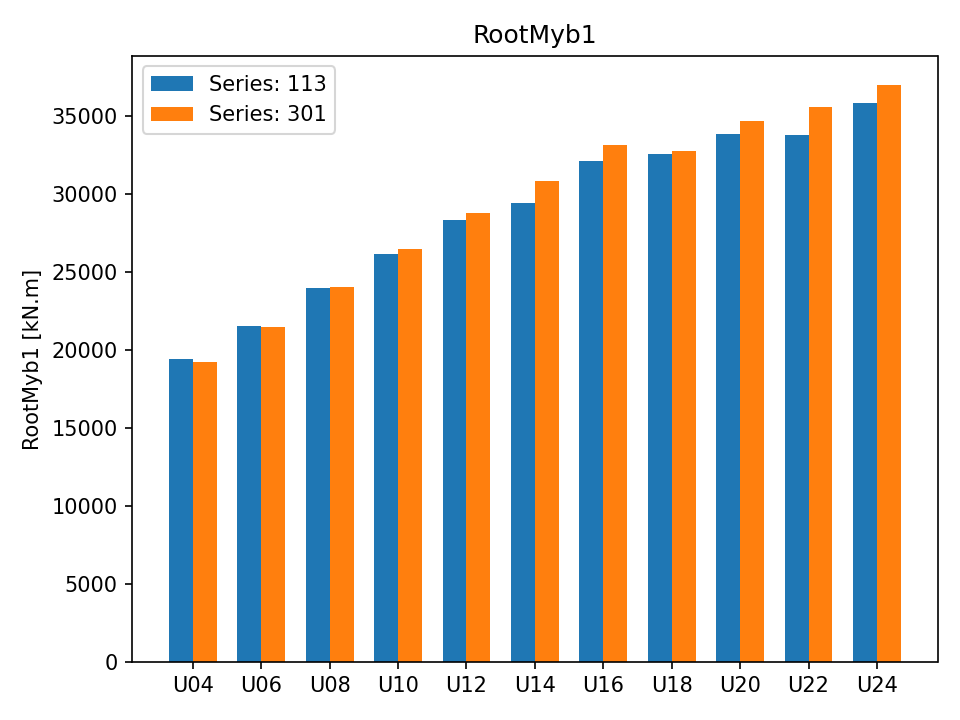

[1.881, 2.232, 2.652, 3.1, 3.428, 3.61, 3.812, 3.837, 3.813, 3.835, 4.562]
[1.885, 2.271, 2.752, 3.231, 3.569, 3.998, 4.036, 4.166, 4.344, 4.676, 5.028]


<IPython.core.display.Javascript object>


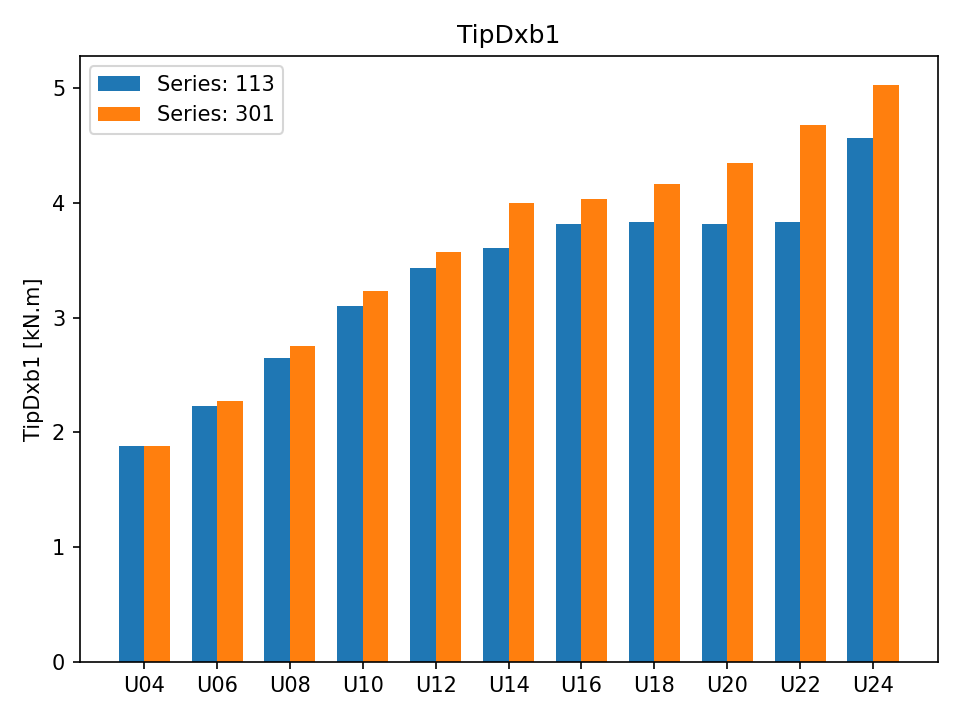

[5.453, 9.846, 13.298, 13.649, 13.894, 12.999, 12.791, 10.625, 9.06, 8.353, 8.937]
[4.921, 9.11, 12.003, 13.923, 13.317, 13.521, 13.235, 12.011, 10.621, 10.115, 11.107]


<IPython.core.display.Javascript object>


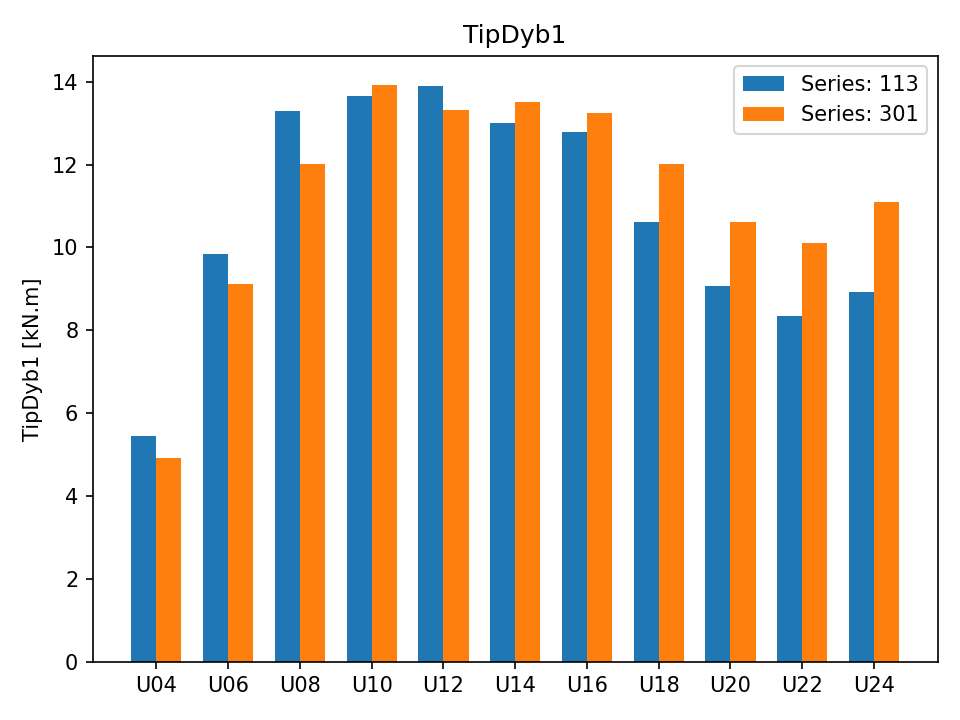

[0.968, 1.193, 1.201, 1.248, 1.386, 1.353, 1.511, 1.671, 1.675, 1.842, 1.949]
[0.974, 1.189, 1.271, 1.329, 1.392, 1.606, 1.794, 1.786, 1.749, 1.9, 2.009]


<IPython.core.display.Javascript object>


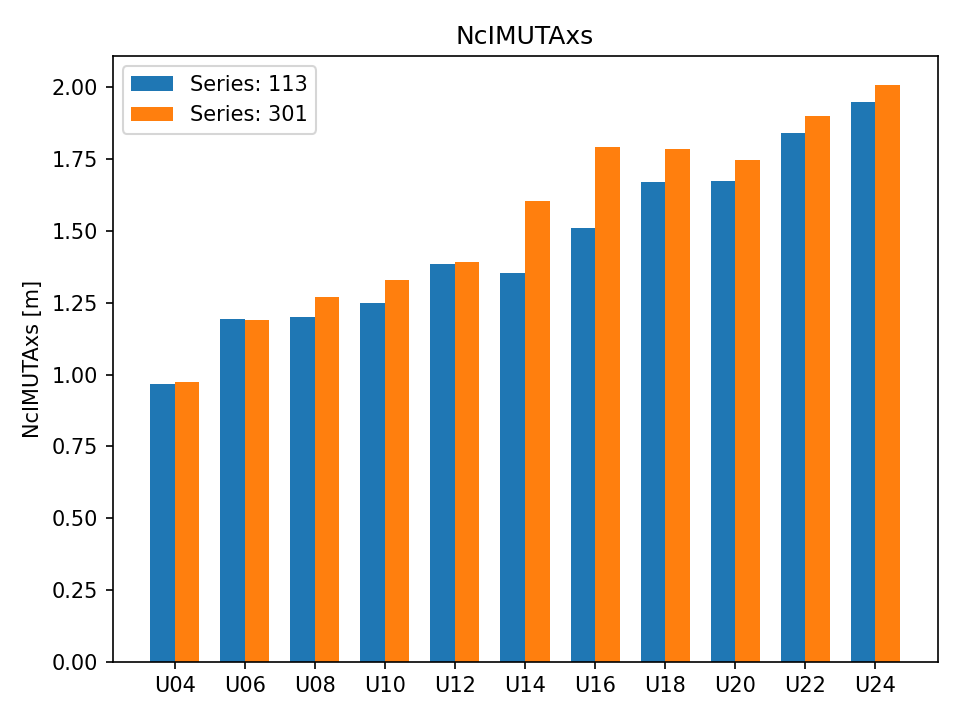

[0.196, 0.26, 0.336, 0.447, 0.691, 0.892, 1.044, 1.177, 1.344, 1.424, 1.444]
[0.25, 0.293, 0.441, 0.613, 0.775, 1.097, 1.281, 1.603, 1.559, 1.63, 1.715]


<IPython.core.display.Javascript object>


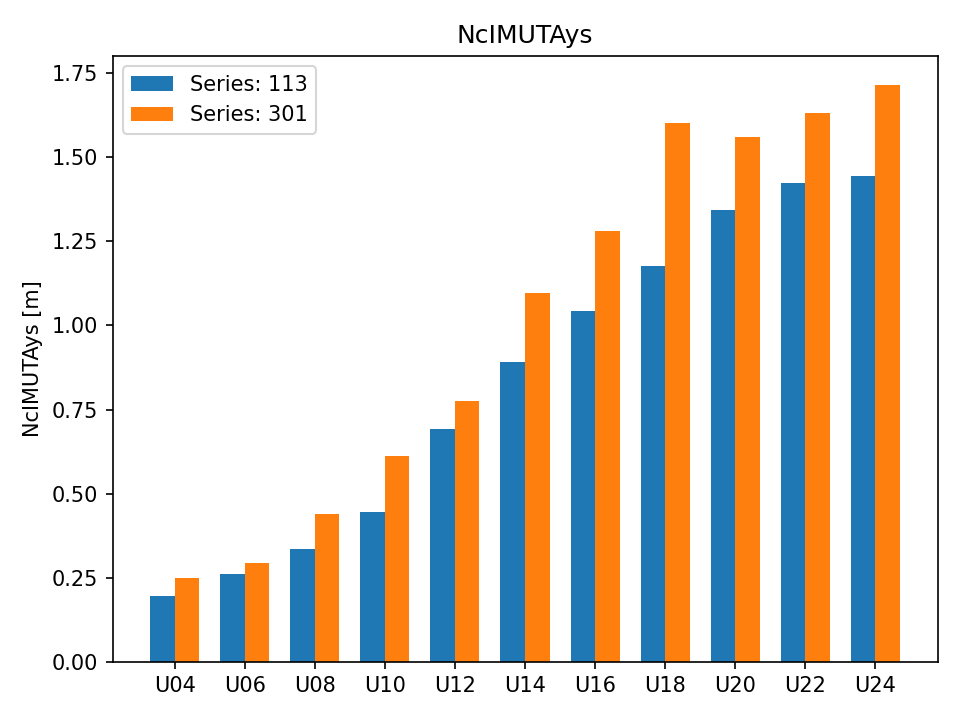

[0.734, 0.908, 0.994, 1.047, 1.173, 1.289, 1.406, 1.424, 1.463, 1.614, 1.692]
[0.732, 0.943, 0.979, 1.141, 1.149, 1.213, 1.417, 1.447, 1.549, 1.507, 1.709]


<IPython.core.display.Javascript object>


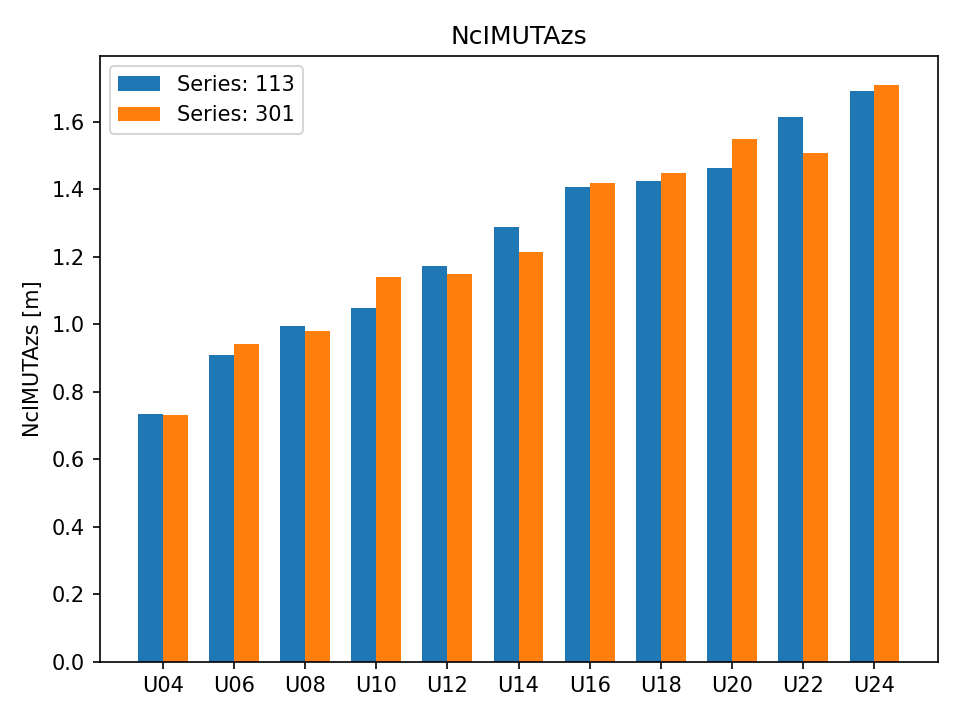

[11.293, 22.29, 30.034, 31.326, 32.178, 30.728, 28.331, 26.111, 24.974, 24.828, 24.938]
[10.093, 21.416, 27.693, 31.048, 30.969, 32.265, 33.503, 31.253, 28.971, 28.267, 27.794]


<IPython.core.display.Javascript object>


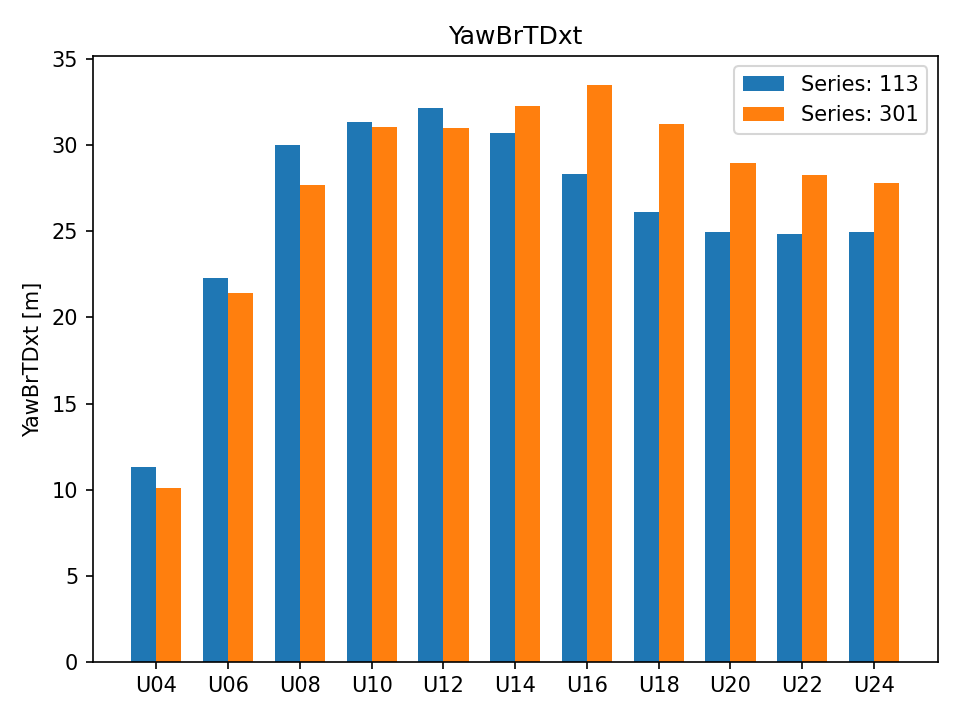

[0.691, 1.55, 2.656, 3.666, 4.075, 5.362, 5.127, 5.968, 6.468, 7.501, 8.097]
[0.733, 1.673, 3.003, 4.963, 6.569, 11.476, 12.401, 14.171, 14.298, 14.591, 15.453]


<IPython.core.display.Javascript object>


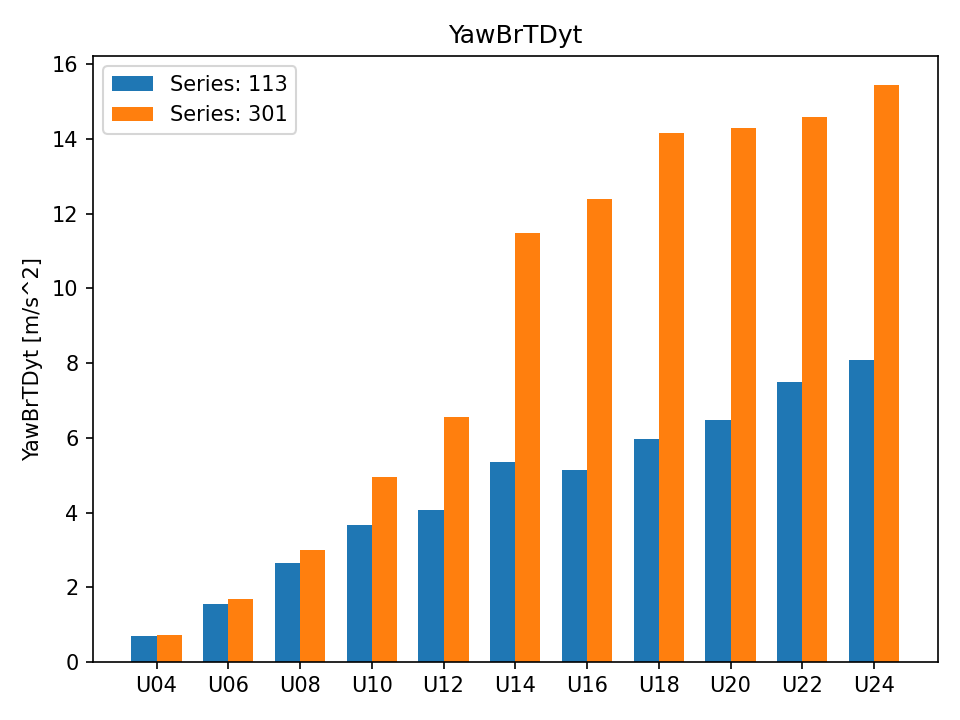

[20343.762, 38601.97, 54776.006, 78020.447, 113539.261, 138434.553, 153583.311, 178741.57, 195352.061, 211858.702, 221333.021]
[21952.76, 41492.69, 69678.704, 108337.777, 155642.365, 265168.161, 286688.919, 338982.706, 333827.31, 342011.941, 364091.264]


<IPython.core.display.Javascript object>


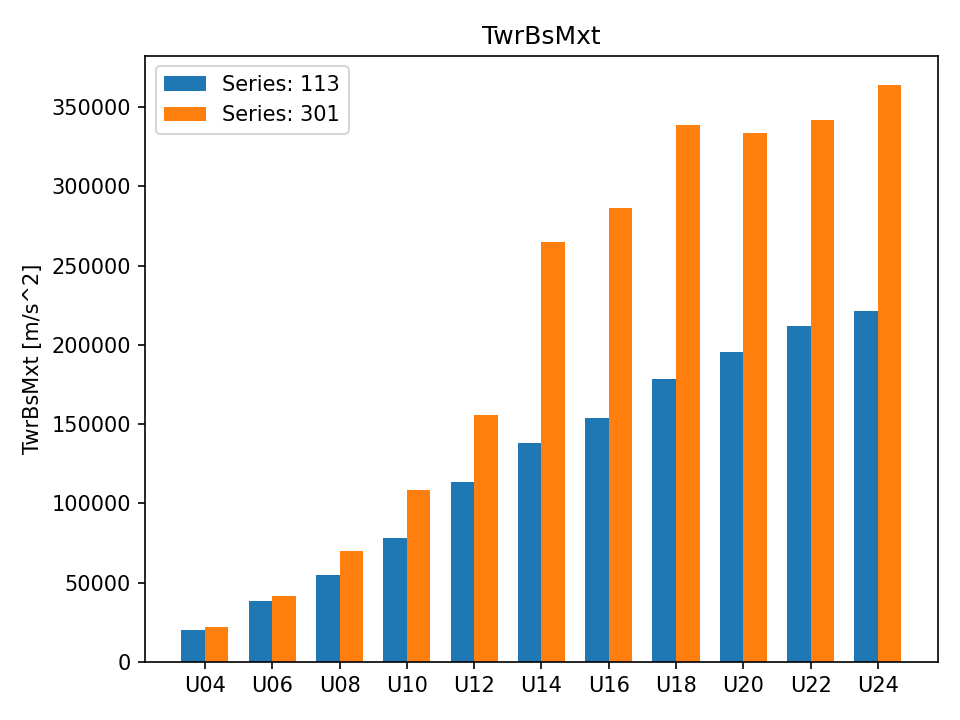

[220421.659, 295036.347, 423411.45, 439394.763, 477216.287, 452715.044, 446629.572, 430014.531, 409096.085, 417384.058, 421668.714]
[241275.471, 286358.881, 396174.254, 443235.943, 473773.457, 506486.782, 537916.346, 486015.183, 466112.091, 471971.578, 463366.801]


<IPython.core.display.Javascript object>


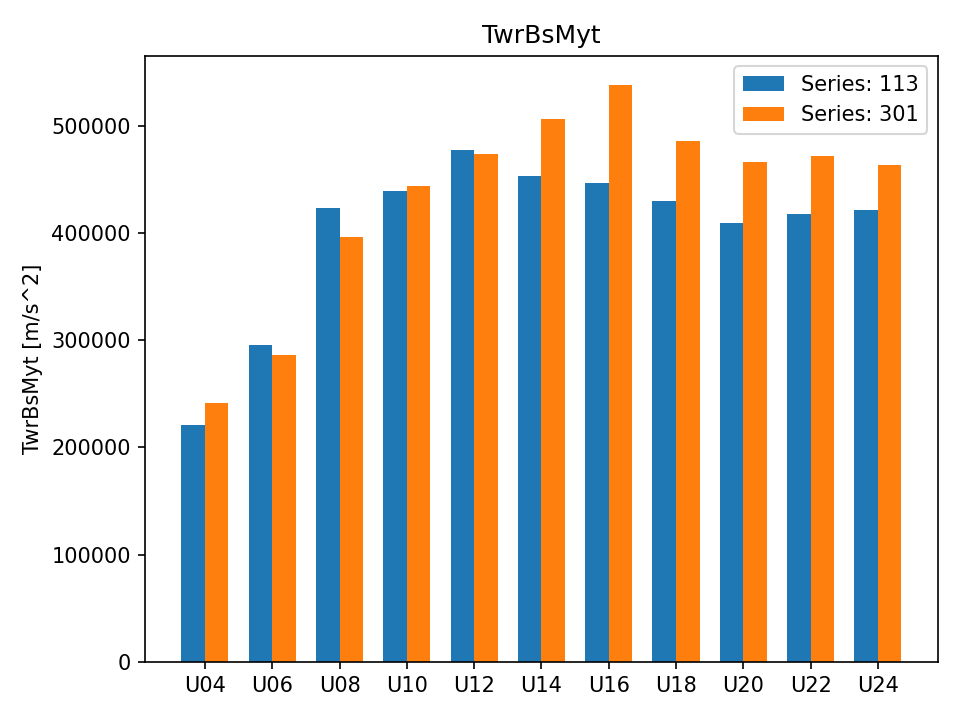

[8.95, 16.237, 20.153, 20.716, 21.191, 20.415, 19.054, 18.301, 17.865, 17.617, 17.594]
[8.276, 15.602, 18.914, 20.243, 20.466, 20.113, 19.083, 18.489, 18.041, 17.72, 17.695]


<IPython.core.display.Javascript object>


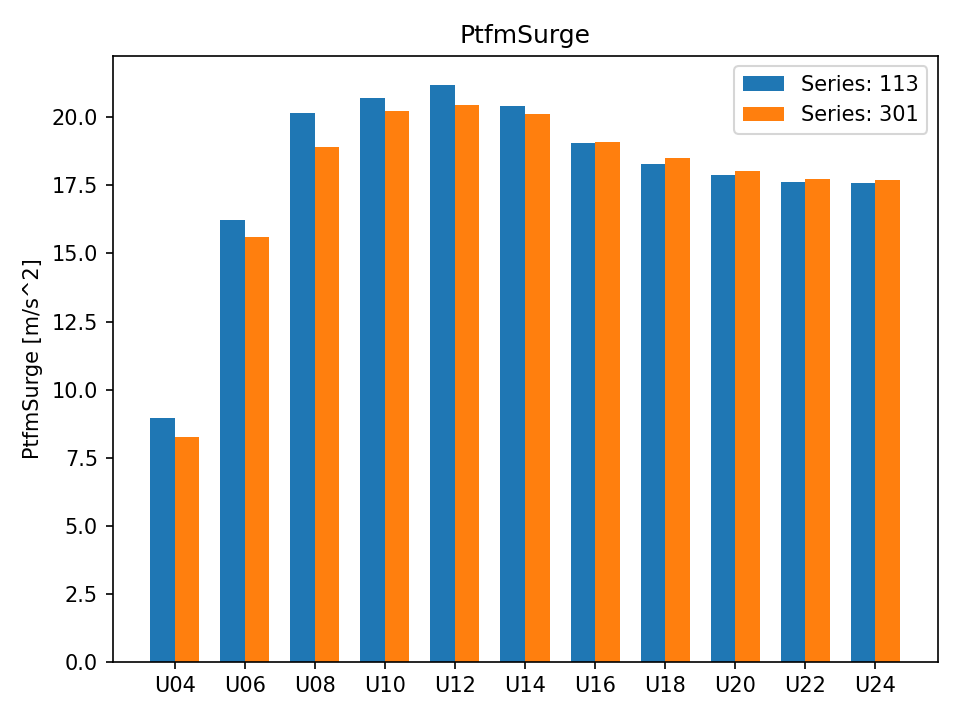

[1.938, 2.867, 2.834, 2.858, 3.033, 3.05, 3.818, 3.799, 3.8, 3.829, 3.834]
[1.939, 2.871, 2.839, 2.855, 3.06, 3.057, 3.839, 3.803, 3.808, 3.836, 3.85]


<IPython.core.display.Javascript object>


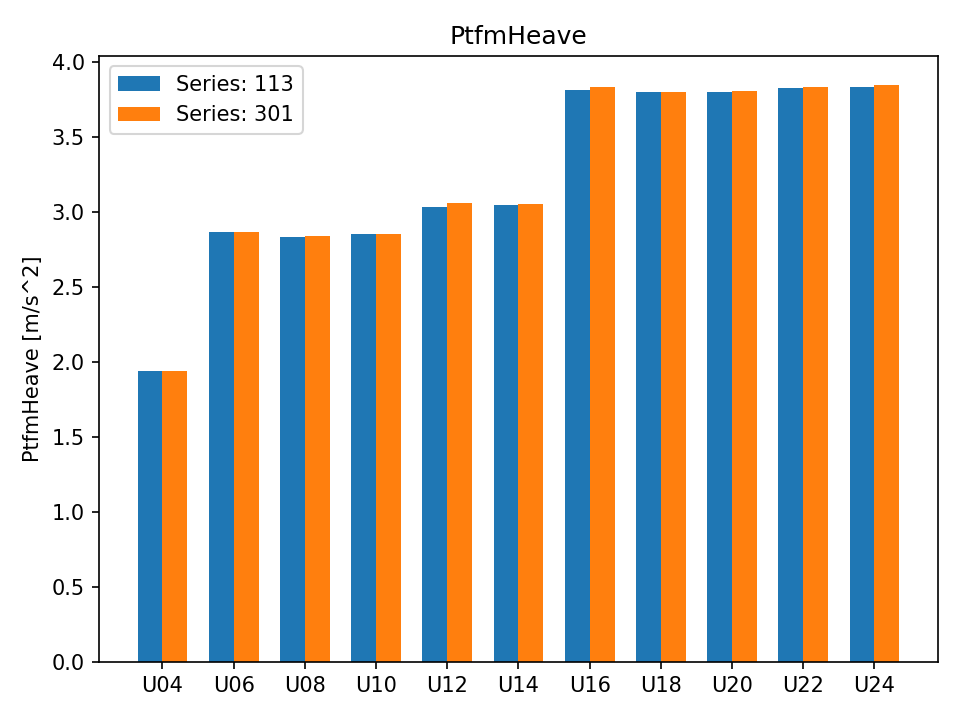

[1.791, 2.645, 4.179, 4.52, 4.826, 4.499, 4.168, 3.743, 3.55, 3.435, 3.423]
[1.929, 2.526, 3.692, 4.419, 4.637, 5.478, 6.153, 5.557, 4.773, 4.809, 4.492]


<IPython.core.display.Javascript object>


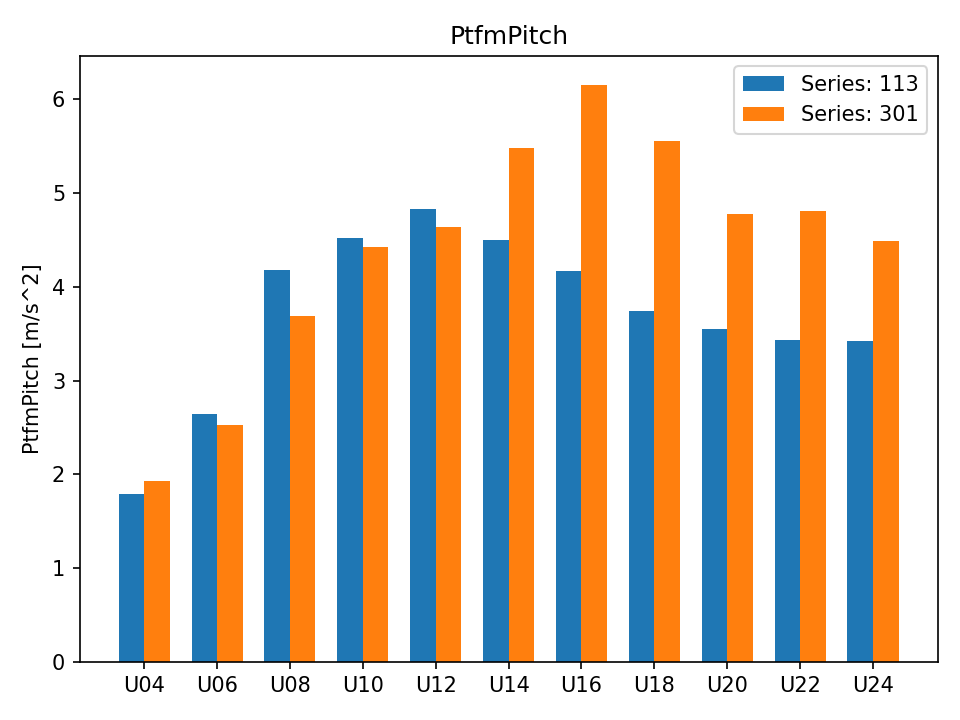

In [11]:
# Plot data

for i in range(n_plot_vars):

    series1 = [round(num,3) for num in plot_data[0,i,:]]

    if len(selected_folders) > 1:
        series2 =  [round(num,3) for num in plot_data[1,i,:]]
    if len(selected_folders) > 2:    
        series3 =  [round(num,3) for num in plot_data[2,i,:]]
    
    print(series1)
    print(series2)
    #print(series3)
    
    if len(selected_folders) == 2:
        st.plot.BarPlot2SeriesWS(plot_vars[i],x_labels,series1,series2,folder_prefix, plot_vars[i] + ' [' + units[i] + ']')
    elif len(selected_folders) == 3:
        st.plot.BarPlot3SeriesWS(plot_vars[i],x_labels,series1,series2,series3,folder_prefix, plot_vars[i] + ' [' + units[i] + ']')

